<div style="border-radius:10px; padding: 15px; background-color: #EFEDF8; font-size:120%; text-align:left">

<h1 align="left"><font color=#hdc388>Titanic Disaster, survivor prediction.</font></h1>
TensorFlow and Keras. Implementation of an Multilayer Perceptron (MLP) model.


---
<h2 align="right" style="font-size: 16px; color: black;"> by: Víctor Nuñez</h2>


As a practice, a simple sequential model is built; no hyperparameter search is carried out to enhance performance.

data: https://www.kaggle.com/competitions/titanic



<a id="libraries"></a>
# <b><span style="color:green;">Step 1 |</span><span style='color:#hdc388'>  📚  Libraries</span></b>

In [ ]:
#Data
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.regularizers import l2


# Hide warnings
import warnings
warnings.filterwarnings('ignore')

<a id="data"></a>
# <b><span style='color:green'>Step 2 |</span><span style='color:#hdc388'> 📑 Loading Data</span></b>

In [ ]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

<a id="description"></a>
<h1 align="center"><font color=#hdc388>Variable Notes</font></h1>


\begin{array}{|l|l|l|}
\hline
\text{Variable} & \text{Definition} & \text{Key} \\
\hline
\text{survival} & \text{Survival} & 0 = \text{No}, 1 = \text{Yes} \\
\text{pclass} & \text{Ticket class} & 1 = \text{1st}, 2 = \text{2nd}, 3 = \text{3rd} \\
\text{sex} & \text{Sex} & \\
\text{Age} & \text{Age in years} & \\
\text{sibsp} & \# \text{ of siblings / spouses aboard the Titanic} & \\
\text{parch} & \# \text{ of parents / children aboard the Titanic} & \\
\text{ticket} & \text{Ticket number} & \\
\text{fare} & \text{Passenger fare} & \\
\text{cabin} & \text{Cabin number} & \\
\text{embarked} & \text{Port of Embarkation} & C = \text{Cherbourg}, Q = \text{Queenstown}, S = \text{Southampton} \\
\hline
\end{array}

In [ ]:
#Target
print(set(train)- set(test))

{'Survived'}


In [ ]:
target = train['Survived']
train =  train.drop(['Survived'], axis = 1)

In [ ]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#PassengerId
ID = test['PassengerId']
test = test.drop(['PassengerId'], axis = 1)
train = train.drop(['PassengerId'], axis = 1)

## Combine Data

In [ ]:
df = pd.concat([train, test], axis = 0).reset_index(drop =  True)

df =  df.drop(['Name'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Ticket    1309 non-null   object 
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB


In [ ]:
df.isna().sum()

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

<a id="data"></a>
# <b><span style='color:green'>Step 3 |</span><span style='color:#hdc388'> ⚙️ Processsing and Cleaning</span></b>

## Categoricals

In [ ]:
df.select_dtypes(object).columns

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

- **Ticket**

In [ ]:
df = df.drop(['Ticket'], axis = 1)

- **Cabin**

In [ ]:
print('Percentage of missing values: {:.1f}% '.format(df['Cabin'].isna().sum()/len(df)*100))

Percentage of missing values: 77.5% 


In [ ]:
df = df.drop(['Cabin'], axis =  1)

- **Embarked**

df['Embarked'].value_counts()

In [ ]:
df['Embarked'] =  df['Embarked'].fillna('S')

## Numericals

In [ ]:
df.select_dtypes(np.number).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

- **Age and Fare**

In [ ]:
#Imputer Fare using the mean value
df['Fare'] = df['Fare'].fillna(round(df['Fare'].mean()))

In [ ]:
#Impute according to its distribution

distribution = df['Age'].value_counts(normalize=True)
imputer = np.random.choice(distribution.index, size = df['Age'].isna().sum(),  p =  distribution)

df.loc[df[df['Age'].isna()].index, 'Age'] =  imputer

In [ ]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_1 = df.copy()

<a id="visualization"></a>
# <b><span style='color:green'>Step 4 |</span><span style='color:#hdc388'> 📊 Exploratory Data Analysis</span></b>

In [ ]:
df_visual = pd.concat([df_1.loc[:train.index.max(),:], target], axis = 1)

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64


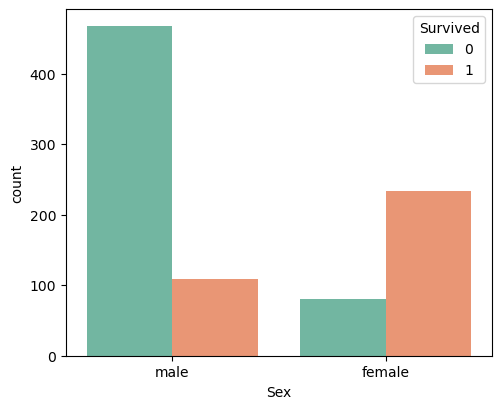

Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.099071
          1           33.900929
Name: Survived, dtype: float64


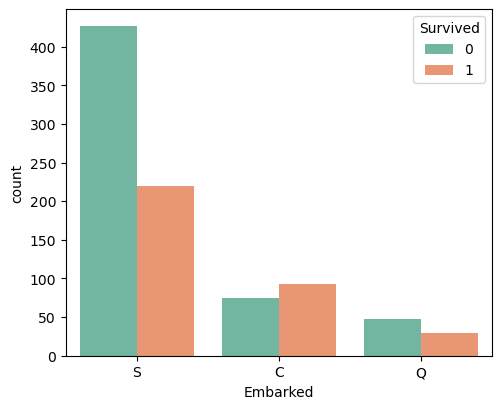

In [ ]:
for col in df_visual.select_dtypes(object):
    plt.figure(figsize=(5.5,4.5))
    sns.countplot(data=df_visual,x=col,hue='Survived',palette='Set2')
    print(df_visual.groupby([col,'Survived'])['Survived'].size()/df_visual.groupby([col])['Survived'].size()*100)
    plt.show()

<a id="split"></a>
# <b><span style='color:green'>Step 5 |</span><span style='color:#hdc388'> 🗂️ Encoding and Splitting for Modeling</span></b>

## Encoding categoricals

In [ ]:
df_1 = pd.get_dummies(df_1, dtype = 'int64')

In [ ]:
df_1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
# Normalize Age and Fare:
scaler = MinMaxScaler()
df_1[['Age', 'Fare']] = scaler.fit_transform(df_1[['Age', 'Fare']])

In [ ]:
df_1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.273456,1,0,0.014151,0,1,0,0,1
1,1,0.473882,1,0,0.139136,1,0,1,0,0
2,3,0.323563,0,0,0.015469,1,0,0,0,1
3,1,0.436302,1,0,0.103644,1,0,0,0,1
4,3,0.436302,0,0,0.015713,0,1,0,0,1


In [ ]:
#We have duplicated in the final df?
df_1.duplicated().sum()

146

## Spliting

In [ ]:
train_final = (df_1.loc[:train.index.max(),:]).copy()
test_final  = (df_1.loc[train.index.max()+1:,:].reset_index(drop = True)).copy()

In [ ]:
duplicated_index = train_final[train_final.duplicated(keep=False)].index

In [ ]:
target = target.drop(duplicated_index, axis = 0)

In [ ]:
train_final = train_final.drop(duplicated_index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_final, target,test_size=0.2, random_state=2024, stratify=target)

In [ ]:
#One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<a id="split"></a>
# <b><span style='color:green'>Step 6 |</span><span style='color:#hdc388'> ⚒️ Modeling</span></b>

In [ ]:
#Parameters
input_size = X_train.shape[1]
neural_units = 10000
batch_size =8
dropout = 0.45
num_labels = len(np.unique(y_train))

In [ ]:
model =  Sequential()
model.add(Dense(neural_units, input_shape = [input_size]))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(neural_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

2024-05-10 04:13:18.988137: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2024-05-10 04:13:19.602744: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2024-05-10 04:13:28.307231: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

## Training and Metrics

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size = batch_size)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8578 - loss: 0.3520
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8473 - loss: 0.3451
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8342 - loss: 0.3476
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8541 - loss: 0.3599
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8460 - loss: 0.3401
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8404 - loss: 0.3586
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8516 - loss: 0.3385
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8337 - loss: 0.3383
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8435 - loss: 0.3470
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8342 - loss: 0.3518


In [ ]:
_,acc = model.evaluate(X_test, y_test,batch_size= batch_size, verbose=0)

print('Test Acc: {:.3}%'.format(acc*100))

Test Acc: 78.3%


# Predictions and Submission

In [ ]:
preds = model.predict(test_final)
preds = np.argmax(preds, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.concat([ID, pd.Series(preds, name = 'Survived')], axis= 1)
submission.to_csv('submission_titanic_MLP.csv',index=False, header= True)